In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:


def find_local_minima(x):
    """
    Finds the local minima of a signal
    """
    minima = []
    for i in range(1, len(x)-1):
        if x[i] < x[i-1] and x[i] < x[i+1]:
            minima.append(i)
    return minima

def find_local_maxima(x):
    """
    Finds the local maxima of a signal
    """
    maxima = []
    for i in range(1, len(x)-1):
        if x[i] > x[i-1] and x[i] > x[i+1]:
            maxima.append(i)
    return maxima

def get_envelopes(x, minima, maxima):
    """
    Gets the upper and lower envelopes of a signal
    """
    n = len(x)
    upper_envelope = np.zeros(n)
    lower_envelope = np.zeros(n)
    
    maxima_index = 0
    minima_index = 0
    for i in range(n):
        if maxima_index < len(maxima) and i == maxima[maxima_index]:
            upper_envelope[i] = x[i]
            maxima_index += 1
        elif minima_index < len(minima) and i == minima[minima_index]:
            lower_envelope[i] = x[i]
            minima_index += 1
        elif maxima_index < len(maxima):
            upper_envelope[i] = (x[i] + x[maxima[maxima_index]]) / 2
        elif minima_index < len(minima):
            lower_envelope[i] = (x[i] + x[minima[minima_index]]) / 2
        else:
            upper_envelope[i] = x[i]
            lower_envelope[i] = x[i]
    return upper_envelope, lower_envelope

def CEMD(x, max_iterations=10):
    """
    Complete Empirical Mode Decomposition
    """
    residual = x.copy()
    IMFs = []
    for i in range(max_iterations):
        minima = find_local_minima(residual)
        maxima = find_local_maxima(residual)
        upper_envelope, lower_envelope = get_envelopes(residual, minima, maxima)
        IMF = (upper_envelope + lower_envelope) / 2
        IMFs.append(IMF)
        residual = residual - IMF
    IMFs.append(residual)
    return IMFs




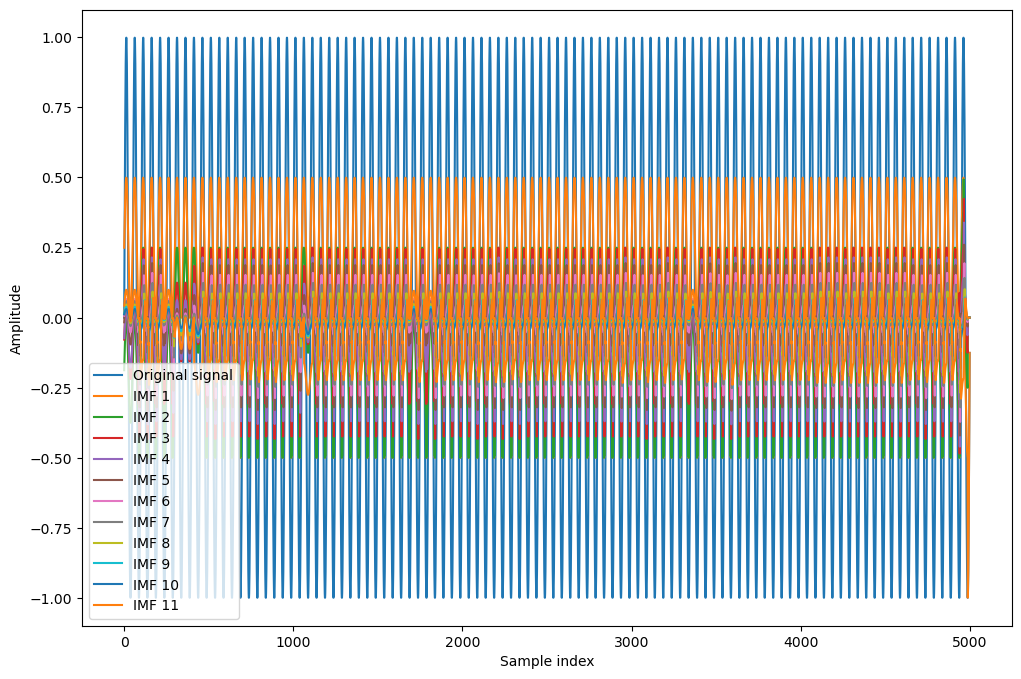

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# generate a signal
fs = 1000 # sample rate
f = 20 # the frequency of the signal
sample = fs * 5 # number of samples
x = np.arange(sample) # the points on the x axis for plotting
y = np.sin(2 * np.pi * f * (x / fs)) # the signal

# perform CEMD on the signal
IMFs = CEMD(y)

# plot the original signal and the IMFs
plt.figure(figsize=(12, 8))
plt.plot(x, y, label='Original signal')
for i, IMF in enumerate(IMFs):
    plt.plot(x, IMF, label=f'IMF {i+1}')
plt.xlabel('Sample index')
plt.ylabel('Amplitude')
plt.legend()
plt.show()
